# Notes on Fuchs and Franks, 2010 (FF10)

This paper is a good starting point for trying to define a parameterization for the size distribution of phytoplankton functional types (PFTs). This notebooks will require several python packages.

In [1]:
import math
import matplotlib
import numpy as np
from scipy import stats
from scipy.stats import lognorm
import matplotlib.pyplot as plt

%matplotlib inline

## Notes on Eq. (1)

Eq. (1) is actually three equations:

*N(t) = N<sub>T</sub> -* Int(*P(x,t)dx*) - Int(*Z(x,t)dx*)

* *t* is time
* *N(t)* is nitrogen concentration (micromols)
* *N<sub>T</sub>* is total nitrogen in the system (1-30 micromol)
* *x* is equivalent spherical diameter (ESD); a measure of the size of PFT class
* *P(x,t)* is total phytoplankton biomass
* *Z(x,t)* is total zooplankton biomass

*dP(x,t)/dt = P(x,t) (-lambda + mu*<sub>max</sub>*(x) N(t)/(N(t) + k*<sub>s</sub>*) - g* Int(*F<sup>-</sup>(x,y)Z(y,t)dy*))

* *lambda*  is phytoplankton mortality rate
* *mu*<sub>max</sub> is maximum phytoplankton growth rate
* *k*<sub>s</sub> is half-saturation constant
* *g* is feeding rate
* *F*<sup>-</sup> is a feeding kernel (FF2010 uses Laplace distribution)

*dZ(x,t)/dt = Z(x,t) (-lambda - g* Int(*F<sup>-</sup>(x,y)Z(y,t)dy*) + *gamma g* Int(*F<sup>+</sup>(x,y)(P(y,t) + Z(y,t))dy*))

* *gamma* is assimilation efficiency
* *F*<sup>+</sup> is a redistibution kernel


## Our goal

Rather than divide *x* into bins and carry around tracers for *P* and *Z* in each size category, can we come up with a distribution for *P* and *Z* and then just transport total mass and total count?

## Where to start

Let *m* denote the biomass of a given PFT. There is some mapping *G(m)* such that *G(m)* = ESD. For now we'll assume *G(m) = (m<sup>3</sup>/C)<sup>1/3</sup>*, where *C* is a density; for now we will assume all PFTs have the same density, but it is possible that *C* itself is a function of *m*.

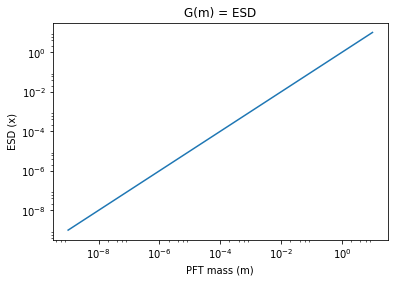

In [2]:
# m is biomass in units of kg
m = 10**(np.linspace(-9, 1, num=100))

def C(m):
  # C is a (made-up) density in kg/m^3
  # for now we use constant (1), but it can certainly depend on m in the future
  return(1)

def G(m):
  # G: kg -> m
  return m/(C(m)**(1./3.))

x = G(m)

plt.loglog(m,x);
plt.title('G(m) = ESD'); plt.xlabel('PFT mass (m)'); plt.ylabel('ESD (x)');


It looks like FF10 assumes P(x,t) is time-invariant and log-linear

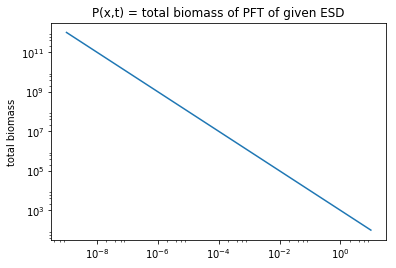

In [3]:
def P(x):
    slope = -1
    intercept = 10**3
    return 10**(slope*np.log10(x)+np.log10(intercept))

plt.loglog(x, P(x));
plt.title('P(x,t) = total biomass of PFT of given ESD'); plt.ylabel('ESD (x)'); plt.ylabel('total biomass');